**Capstone 1 - Instacart Market Basket Analysis**

<p>
Instacart is a U.S. based company that provides same-day grocery delivery service. It provides the customers an option to choose the grocery store they want their groceries through the item list, select the items and get it hand-delivered by a personal shopper. The company offers the services both through their website as well their app.

They have over 3 million transactional data of multiple shoppers located across the United States.
</p>

<p>
Problem Statement Instacart wants to leverage this data to build a model that can predict which previously purchased products will be in a user’s next order. This will help the company strategize where to show the previously ordered items on their page or app.The model will also help recommend items for users while they are browsing.
</p>

In [1]:
#Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Import the files
#files provided - aisles, products,departments,orders_prior,orders

#aisles
aisles = pd.read_csv('aisles.csv')
#importing the departments file
departments= pd.read_csv('departments.csv')
# importing the products file
#products
products =pd.read_csv("products.csv")
#orders_prior
#importing the orders_prior file
orders_prior =pd.read_csv("order_products__prior.csv")
#5
#importing the orders_train file
order_train = pd.read_csv('order_products__train.csv')
#6 orders
orders = pd.read_csv('orders.csv')

In [249]:
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [336]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421083 entries, 2539329 to 272231
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 368.8+ MB


In [337]:
order_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
orders_t =pd.merge(order_train,orders,how='inner',left_on='order_id',right_on='order_id',suffixes = ('_x', '_y'))

In [338]:
orders_t.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0
5,1,13176,6,0,112108,train,4,4,10,9.0
6,1,47209,7,0,112108,train,4,4,10,9.0
7,1,22035,8,1,112108,train,4,4,10,9.0
8,36,39612,1,0,79431,train,23,6,18,30.0
9,36,19660,2,1,79431,train,23,6,18,30.0


In [6]:
orders_t['eval_set'].unique()

array(['train'], dtype=object)

In [7]:
# Merging files
#merging product with aisle and department files

products_a = pd.merge(products,aisles,on='aisle_id')
products_all =pd.merge(products_a,departments,left_on = 'department_id'
                       ,right_on = 'department_id',how='left',suffixes = ('_x', '_y'))
products_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
aisle            49688 non-null object
department       49688 non-null object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [8]:
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [329]:
#orders_all = pd.merge(orders,orders_prior,left_on= 'order_id',right_on='order_id',how="left",suffixes = ('_x', '_y'))
orders_all = pd.merge(orders_t,products_all,left_on= 'product_id',right_on='product_id',how="left" )
orders_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
order_id                  1384617 non-null int64
product_id                1384617 non-null int64
add_to_cart_order         1384617 non-null int64
reordered                 1384617 non-null int64
user_id                   1384617 non-null int64
eval_set                  1384617 non-null object
order_number              1384617 non-null int64
order_dow                 1384617 non-null int64
order_hour_of_day         1384617 non-null int64
days_since_prior_order    1384617 non-null float64
product_name              1384617 non-null object
aisle_id                  1384617 non-null int64
department_id             1384617 non-null int64
aisle                     1384617 non-null object
department                1384617 non-null object
dtypes: float64(1), int64(10), object(4)
memory usage: 169.0+ MB


In [339]:
orders_all.sort_values(by=['order_id'], ascending=False)
orders_all.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
5,1,13176,6,0,112108,train,4,4,10,9.0,Bag of Organic Bananas,24,4,fresh fruits,produce
6,1,47209,7,0,112108,train,4,4,10,9.0,Organic Hass Avocado,24,4,fresh fruits,produce
7,1,22035,8,1,112108,train,4,4,10,9.0,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
8,36,39612,1,0,79431,train,23,6,18,30.0,Grated Pecorino Romano Cheese,2,16,specialty cheeses,dairy eggs
9,36,19660,2,1,79431,train,23,6,18,30.0,Spring Water,115,7,water seltzer sparkling water,beverages


In [10]:
orders_all['eval_set'].unique()

array(['train'], dtype=object)

In [111]:
orders_all.head(15)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
5,1,13176,6,0,112108,train,4,4,10,9.0,Bag of Organic Bananas,24,4,fresh fruits,produce
6,1,47209,7,0,112108,train,4,4,10,9.0,Organic Hass Avocado,24,4,fresh fruits,produce
7,1,22035,8,1,112108,train,4,4,10,9.0,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
8,36,39612,1,0,79431,train,23,6,18,30.0,Grated Pecorino Romano Cheese,2,16,specialty cheeses,dairy eggs
9,36,19660,2,1,79431,train,23,6,18,30.0,Spring Water,115,7,water seltzer sparkling water,beverages


In [473]:
prods = pd.DataFrame()
prods['orders'] = orders_prior.groupby(orders_prior.product_id).size().astype(np.int32)
prods['reorders'] = orders_prior['reordered'].groupby(orders_prior.product_id).sum().astype(np.float32)
prods['reorder_rate'] = (prods.reorders / prods.orders).astype(np.float32)


In [474]:
prods['dow_cnt'] = orders.order_dow.value_counts(normalize=True)

In [475]:
prods['prod_dow_ratio'] = prods.dow_cnt / prods.groupby('product_id').transform(np.sum).dow_cnt

In [14]:
prods.head(10)

,orders,reorders,reorder_rate
product_id,,,
1,1852,1136.0,0.613391
2,90,12.0,0.133333
3,277,203.0,0.732852
4,329,147.0,0.446809
5,15,9.0,0.600000
6,8,3.0,0.375000
7,30,12.0,0.400000
8,165,83.0,0.503030
9,156,82.0,0.525641


In [476]:
#products_n = pd.merge(products,prods, left_on='product_id',right_on='product_id',how="inner",suffixes = ('_x', '_y'))
orders_all_prods = pd.merge(orders_all,prods, left_on='product_id',right_on='product_id',how="inner")

In [477]:
orders_all_prods.info()
#orders_all_prods.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384608 entries, 0 to 1384607
Data columns (total 20 columns):
order_id                  1384608 non-null int64
product_id                1384608 non-null int64
add_to_cart_order         1384608 non-null int64
reordered                 1384608 non-null int64
user_id                   1384608 non-null int64
eval_set                  1384608 non-null object
order_number              1384608 non-null int64
order_dow                 1384608 non-null int64
order_hour_of_day         1384608 non-null int64
days_since_prior_order    1384608 non-null float64
product_name              1384608 non-null object
aisle_id                  1384608 non-null int64
department_id             1384608 non-null int64
aisle                     1384608 non-null object
department                1384608 non-null object
orders                    1384608 non-null int32
reorders                  1384608 non-null float32
reorder_rate              1384608 non-null flo

In [256]:
#prods['orders'] = orders_prior.groupby(orders_prior.product_id).size().astype(np.int32)
#usr['average_days_between_orders'] = orders.groupby(['user_id','days_since_prior_order']).size().astype(np.float32)

In [250]:
priors = orders_prior.join(orders_all, on='order_id', rsuffix='_')
priors.drop('order_id_', inplace=True, axis=1)

In [251]:
priors.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_id_,add_to_cart_order_,reordered_,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,10246.0,3.0,0.0,112108.0,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83.0,4.0,fresh vegetables,produce
1,2,28985,2,1,10246.0,3.0,0.0,112108.0,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83.0,4.0,fresh vegetables,produce
2,2,9327,3,0,10246.0,3.0,0.0,112108.0,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83.0,4.0,fresh vegetables,produce
3,2,45918,4,1,10246.0,3.0,0.0,112108.0,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83.0,4.0,fresh vegetables,produce
4,2,30035,5,0,10246.0,3.0,0.0,112108.0,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83.0,4.0,fresh vegetables,produce


In [485]:
print('computing user f')
usr = pd.DataFrame()
usr['average_days_between_orders'] = orders_all.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
usr['nb_orders'] = orders_all.groupby('user_id').size().astype(np.int16)
usr.info()
usr.head(5)

computing user f
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131209 entries, 1 to 206209
Data columns (total 2 columns):
average_days_between_orders    131209 non-null float32
nb_orders                      131209 non-null int16
dtypes: float32(1), int16(1)
memory usage: 1.8 MB


,average_days_between_orders,nb_orders
user_id,,
1,14.0,11
2,30.0,31
5,6.0,9
7,6.0,9
8,10.0,18


In [486]:
test=orders_all[orders_all['user_id']==1]
test.days_since_prior_order.unique()

array([14.])

In [487]:
users = pd.DataFrame()
users['total_items'] = priors.groupby('user_id').size().astype(np.int16)
users['all_products'] = priors.groupby('user_id')['product_id'].apply(set)
users['total_distinct_items'] = (users.all_products.map(len)).astype(np.int16)

In [488]:
users.info()
users.head(5)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 130778 entries, 1.0 to 206209.0
Data columns (total 3 columns):
total_items             130778 non-null int16
all_products            130778 non-null object
total_distinct_items    130778 non-null int16
dtypes: int16(2), object(1)
memory usage: 2.5+ MB


,total_items,all_products,total_distinct_items
user_id,,,
1.0,183,"{14337, 11782, 47626, 39947, 10768, 17948, 348...",174
2.0,279,"{11777, 36865, 45570, 40454, 46087, 45063, 327...",254
5.0,107,"{8193, 23554, 13829, 3599, 22035, 48679, 16937...",104
7.0,94,"{20995, 45066, 47626, 22028, 15902, 45603, 297...",90
8.0,153,"{11777, 21511, 48647, 39945, 45066, 49683, 394...",143


In [489]:
users=pd.merge(users,usr,on='user_id',how='inner',suffixes = ('_x', '_y'))
users.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 130778 entries, 1.0 to 206209.0
Data columns (total 5 columns):
total_items                    130778 non-null int16
all_products                   130778 non-null object
total_distinct_items           130778 non-null int16
average_days_between_orders    130778 non-null float32
nb_orders                      130778 non-null int16
dtypes: float32(1), int16(3), object(1)
memory usage: 3.2+ MB


In [491]:
users.head(5)

,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders
user_id,,,,,
1.0,183,"{14337, 11782, 47626, 39947, 10768, 17948, 348...",174,14.0,11
2.0,279,"{11777, 36865, 45570, 40454, 46087, 45063, 327...",254,30.0,31
5.0,107,"{8193, 23554, 13829, 3599, 22035, 48679, 16937...",104,6.0,9
7.0,94,"{20995, 45066, 47626, 22028, 15902, 45603, 297...",90,6.0,9
8.0,153,"{11777, 21511, 48647, 39945, 45066, 49683, 394...",143,10.0,18


In [492]:
users['average_basket'] = (users.total_items / users.nb_orders).astype(np.float32)

In [493]:
users.head(5)

,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket
user_id,,,,,,
1.0,183,"{14337, 11782, 47626, 39947, 10768, 17948, 348...",174,14.0,11,16.636364
2.0,279,"{11777, 36865, 45570, 40454, 46087, 45063, 327...",254,30.0,31,9.000000
5.0,107,"{8193, 23554, 13829, 3599, 22035, 48679, 16937...",104,6.0,9,11.888889
7.0,94,"{20995, 45066, 47626, 22028, 15902, 45603, 297...",90,6.0,9,10.444445
8.0,153,"{11777, 21511, 48647, 39945, 45066, 49683, 394...",143,10.0,18,8.500000


In [494]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 130778 entries, 1.0 to 206209.0
Data columns (total 6 columns):
total_items                    130778 non-null int16
all_products                   130778 non-null object
total_distinct_items           130778 non-null int16
average_days_between_orders    130778 non-null float32
nb_orders                      130778 non-null int16
average_basket                 130778 non-null float32
dtypes: float32(2), int16(3), object(1)
memory usage: 3.7+ MB


In [495]:
orders_all.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [496]:
#creating another dataset that will have user_id and product id and order id information
orders_all_prods_usr = pd.merge(orders_all_prods,users,left_on= 'user_id',right_on='user_id',how="inner",
                        suffixes = ('_x', '_y'))
orders_all_prods_usr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384143 entries, 0 to 1384142
Data columns (total 26 columns):
order_id                       1384143 non-null int64
product_id                     1384143 non-null int64
add_to_cart_order              1384143 non-null int64
reordered                      1384143 non-null int64
user_id                        1384143 non-null int64
eval_set                       1384143 non-null object
order_number                   1384143 non-null int64
order_dow                      1384143 non-null int64
order_hour_of_day              1384143 non-null int64
days_since_prior_order         1384143 non-null float64
product_name                   1384143 non-null object
aisle_id                       1384143 non-null int64
department_id                  1384143 non-null int64
aisle                          1384143 non-null object
department                     1384143 non-null object
orders                         1384143 non-null int32
reorders         

In [497]:
orders_all_prods_usr.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,reorders,reorder_rate,dow_cnt,prod_dow_ratio,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket
0,1,49302,1,1,112108,train,4,4,10,9.0,...,101.0,0.619632,NaN,NaN,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625
1,1,11109,2,1,112108,train,4,4,10,9.0,...,3192.0,0.713775,NaN,NaN,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625
2,1,10246,3,0,112108,train,4,4,10,9.0,...,12498.0,0.524553,NaN,NaN,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625
3,1,49683,4,0,112108,train,4,4,10,9.0,...,67313.0,0.691702,NaN,NaN,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625
4,1,43633,5,1,112108,train,4,4,10,9.0,...,312.0,0.477795,NaN,NaN,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625


In [498]:
#handling the NaN values
orders_all_prods_usr = orders_all_prods_usr.fillna(0).reset_index()
orders_all_prods_usr.head(2)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,reorders,reorder_rate,dow_cnt,prod_dow_ratio,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket
0,0,1,49302,1,1,112108,train,4,4,10,...,101.0,0.619632,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625
1,1,1,11109,2,1,112108,train,4,4,10,...,3192.0,0.713775,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625


In [499]:
orders_all_prods_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384143 entries, 0 to 1384142
Data columns (total 27 columns):
index                          1384143 non-null int64
order_id                       1384143 non-null int64
product_id                     1384143 non-null int64
add_to_cart_order              1384143 non-null int64
reordered                      1384143 non-null int64
user_id                        1384143 non-null int64
eval_set                       1384143 non-null object
order_number                   1384143 non-null int64
order_dow                      1384143 non-null int64
order_hour_of_day              1384143 non-null int64
days_since_prior_order         1384143 non-null float64
product_name                   1384143 non-null object
aisle_id                       1384143 non-null int64
department_id                  1384143 non-null int64
aisle                          1384143 non-null object
department                     1384143 non-null object
orders           

In [482]:
orders_all_prods_usr['eval_set'].unique()

array(['train'], dtype=object)

In [500]:
orders_all_prods_usr.head(2)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,reorders,reorder_rate,dow_cnt,prod_dow_ratio,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket
0,0,1,49302,1,1,112108,train,4,4,10,...,101.0,0.619632,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625
1,1,1,11109,2,1,112108,train,4,4,10,...,3192.0,0.713775,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625


In [501]:
orders_all_prods_usr['reorders_by_users'] = orders_all_prods_usr['reordered'].groupby(orders_all_prods_usr.user_id).sum().astype(np.float32)
orders_all_prods_usr['reorder_ratio_by_user'] = (orders_all_prods_usr.reorders_by_users / orders_all_prods_usr.nb_orders).astype(np.float32)
orders_all_prods_usr.head(2)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,dow_cnt,prod_dow_ratio,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket,reorders_by_users,reorder_ratio_by_user
0,0,1,49302,1,1,112108,train,4,4,10,...,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,NaN,NaN
1,1,1,11109,2,1,112108,train,4,4,10,...,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,10.0,1.25


In [502]:
orders_all_prods_usr = orders_all_prods_usr.fillna(0)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,dow_cnt,prod_dow_ratio,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket,reorders_by_users,reorder_ratio_by_user
0,0,1,49302,1,1,112108,train,4,4,10,...,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,0.0,0.00
1,1,1,11109,2,1,112108,train,4,4,10,...,0.0,0.0,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,10.0,1.25


In [546]:
orders_all_prods_usr.head(5)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket,reorders_by_users,reorder_ratio_by_user,exp_reorder_rau,mean_add_to_c
0,0,1,49302,1,1,112108,train,4,4,10,...,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,0.0,0.00,1.000000,-7.760601
1,1,1,11109,2,1,112108,train,4,4,10,...,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,10.0,1.25,3.490343,-6.760601
2,2,1,10246,3,0,112108,train,4,4,10,...,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,12.0,1.50,4.481689,-5.760601
3,3,1,49683,4,0,112108,train,4,4,10,...,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,0.0,0.00,1.000000,-4.760601
4,4,1,43633,5,1,112108,train,4,4,10,...,61,"{15873, 17794, 48002, 17668, 32645, 24838, 456...",61,9.0,8,7.625,0.0,0.00,1.000000,-3.760601


In [524]:
orders_all_prods_usr['exp_reorder_rau'] = orders_all_prods_usr.reorder_ratio_by_user.apply(np.exp)

In [545]:
orders_all_prods_usr['mean_add_to_c'] = orders_all_prods_usr['add_to_cart_order'] - orders_all_prods_usr['add_to_cart_order'].mean()

In [620]:
#unique item order ratio
orders_all_prods_usr['total_distinct_item_ratio'] = 
orders_all_prods_usr['total_distinct_items']/orders_all_prods_usr['order_number']

In [644]:
orders_all_prods_usr['total_ordered_item'] = orders_all_prods_usr.groupby('user_id').product_id.cumsum()
orders_all_prods_usr['total_ordered_item_ratio'] = orders_all_prods_usr['total_ordered_item']/orders_all_prods_usr['order_number']

In [645]:
orders_all_prods_usr.head(2)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,average_days_between_orders,nb_orders,average_basket,reorders_by_users,reorder_ratio_by_user,exp_reorder_rau,mean_add_to_c,total_distinct_item_ratio,total_ordered_item,total_ordered_item_ratio
0,0,1,49302,1,1,112108,train,4,4,10,...,9.0,8,7.625,0.0,0.00,1.000000,-7.760601,15.25,49302,12325.50
1,1,1,11109,2,1,112108,train,4,4,10,...,9.0,8,7.625,10.0,1.25,3.490343,-6.760601,15.25,60411,15102.75


In [653]:
orders_all_prods_usr['unreordered'] = 1-orders_all_prods_usr.reordered
orders_all_prods_usr['unreordered_ratio'] = orders_all_prods_usr.groupby(['order_id']).unreordered.mean()
#unreordered_ratio.columns = ['order_id', 'unreordered_ratio']

In [654]:
orders_all_prods_usr.head(2)

,index,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,average_basket,reorders_by_users,reorder_ratio_by_user,exp_reorder_rau,mean_add_to_c,total_distinct_item_ratio,total_ordered_item,total_ordered_item_ratio,unreordered,unreordered_ratio
0,0,1,49302,1,1,112108,train,4,4,10,...,7.625,0.0,0.00,1.000000,-7.760601,15.25,49302,12325.50,0,NaN
1,1,1,11109,2,1,112108,train,4,4,10,...,7.625,10.0,1.25,3.490343,-6.760601,15.25,60411,15102.75,0,0.5


In [646]:
#orders_all_prods_usr.drop(['level_0'], axis=1)
orders_all_prods_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384143 entries, 0 to 1384142
Data columns (total 34 columns):
index                          1384143 non-null int64
order_id                       1384143 non-null int64
product_id                     1384143 non-null int64
add_to_cart_order              1384143 non-null int64
reordered                      1384143 non-null int64
user_id                        1384143 non-null int64
eval_set                       1384143 non-null object
order_number                   1384143 non-null int64
order_dow                      1384143 non-null int64
order_hour_of_day              1384143 non-null int64
days_since_prior_order         1384143 non-null float64
product_name                   1384143 non-null object
aisle_id                       1384143 non-null int64
department_id                  1384143 non-null int64
aisle                          1384143 non-null object
department                     1384143 non-null object
orders           

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [651]:
data_final_vars=[
 'product_id',
 'user_id',
 'order_number',
 'order_dow',
 'add_to_cart_order',
 'order_hour_of_day',
 'days_since_prior_order',
 'aisle_id',
 'department_id',
 'orders',
 'reorder_rate',
 'prod_dow_ratio',
 'total_items',
 'total_distinct_items',
 'average_days_between_orders',
 'nb_orders',
 'average_basket',
 'reorders_by_users',
 'exp_reorder_rau',
 'mean_add_to_c',
 'total_ordered_item',
 'total_ordered_item_ratio',
 'total_distinct_item_ratio'
]

In [652]:
# create X (features) and y (response)
Xf = orders_all_prods_usr[data_final_vars]
Yf = orders_all_prods_usr.reordered
X_train, X_test, y_train, y_test = train_test_split(Xf, Yf, test_size=0.8, random_state=2)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6761960237150224
Precision: 0.6964963143248228
Recall: 0.8132493208572291


In [593]:
#printing the unique value
for col in X:
    print(col)
    print(X[col].unique())

product_id
[49302 11109 10246 ... 13315 26328 24862]
user_id
[112108  47901   2993 ... 157916   9810 189142]
order_number
[  4  14  15   5  49   7  42  20   9  11  21  25  38  12  23  13   8  35
  51  28  18  19  44  22  17  10  33  45  63  40  61  56  39  31  26  32
  27  43   6  67  29  16  54  64  50  59  37  46  34  24  48  41  92  79
  94  98  30  53 100  71  77  70  52  69  95  36  73  60  72  76  75  68
  55  66  57  99  62  78  90  84  47  65  74  89  83  58  81  85  80  82
  86  97  96  91  87  93  88]
order_dow
[4 0 3 1 2 5 6]
add_to_cart_order
[ 1  2  3  4  5  6  7  8 14 15 16 12 11  9 13 10 17 21 23 18 19 22 20 31
 28 27 25 30 26 24 29 35 36 34 40 38 39 37 33 32 41 43 42 44 51 52 45 47
 53 50 46 48 49 55 54 56 57 60 61 58 59 62 63 66 64 65 68 67 70 69 75 74
 76 71 73 72 79 78 80 77]
order_hour_of_day
[10  6  7  8 14 20 19 13 17 18 15 12 11 16  9  0 21 22  4 23  5  1  2  3]
days_since_prior_order
[ 9. 16.  7. 14. 30. 15.  4. 27.  6. 19.  8. 13. 24. 12.  5. 17.  0. 25.
 28.  

In [623]:
X=orders_all_prods_usr[data_final_vars]

X.head(5)

,product_id,user_id,order_number,order_dow,add_to_cart_order,order_hour_of_day,days_since_prior_order,aisle_id,department_id,orders,...,prod_dow_ratio,total_items,total_distinct_items,average_days_between_orders,nb_orders,average_basket,reorders_by_users,exp_reorder_rau,mean_add_to_c,total_distinct_item_ratio
0,49302,112108,4,4,1,10,9.0,120,16,163,...,0.0,61,61,9.0,8,7.625,0.0,1.000000,-7.760601,15.25
1,11109,112108,4,4,2,10,9.0,108,16,4472,...,0.0,61,61,9.0,8,7.625,10.0,3.490343,-6.760601,15.25
2,10246,112108,4,4,3,10,9.0,83,4,23826,...,0.0,61,61,9.0,8,7.625,12.0,4.481689,-5.760601,15.25
3,49683,112108,4,4,4,10,9.0,83,4,97315,...,0.0,61,61,9.0,8,7.625,0.0,1.000000,-4.760601,15.25
4,43633,112108,4,4,5,10,9.0,95,15,653,...,0.0,61,61,9.0,8,7.625,0.0,1.000000,-3.760601,15.25


In [624]:
# First extract the target variable which is our House prices
Y = orders_all_prods_usr.reordered.values

In [625]:
X1 = X.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = orders_all_prods_usr.columns

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [612]:
type(Y)
Y

array([1, 1, 0, ..., 1, 0, 1])

In [599]:
# Construct our Logistic Regression model
model = LogisticRegression()
model.fit(X1,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [513]:
rfe = RFE(model, 26)
rfe = rfe.fit(X1, Y)

In [371]:
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['product_id', 'add_to_cart_order', 'user_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'aisle_id', 'department_id', 'orders', 'reorders', 'reorder_rate', 'total_items', 'total_distinct_items', 'average_days_between_orders', 'nb_orders', 'average_basket']


In [372]:
sel_col=['product_id',
 'user_id',
 'order_number',
 'order_dow',
 'add_to_cart_order',
 'order_hour_of_day',
 'days_since_prior_order',
 'aisle_id',
 'department_id',
 'orders',
 'reorder_rate',
 'prod_dow_ratio',
 'total_items',
 'total_distinct_items',
 'average_days_between_orders',
 'nb_orders',
 'average_basket',
 'reorders_by_users',
 'exp_reorder_rau',
 'mean_add_to_c',
 'total_ordered_item',
 'total_ordered_item_ratio',
 'total_distinct_item_ratio'
]

In [514]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [626]:
# create X (features) and y (response)
Xf = orders_all_prods_usr[data_final_vars]
Yf = orders_all_prods_usr.reordered

In [627]:
Xf.head(5)

,product_id,user_id,order_number,order_dow,add_to_cart_order,order_hour_of_day,days_since_prior_order,aisle_id,department_id,orders,...,prod_dow_ratio,total_items,total_distinct_items,average_days_between_orders,nb_orders,average_basket,reorders_by_users,exp_reorder_rau,mean_add_to_c,total_distinct_item_ratio
0,49302,112108,4,4,1,10,9.0,120,16,163,...,0.0,61,61,9.0,8,7.625,0.0,1.000000,-7.760601,15.25
1,11109,112108,4,4,2,10,9.0,108,16,4472,...,0.0,61,61,9.0,8,7.625,10.0,3.490343,-6.760601,15.25
2,10246,112108,4,4,3,10,9.0,83,4,23826,...,0.0,61,61,9.0,8,7.625,12.0,4.481689,-5.760601,15.25
3,49683,112108,4,4,4,10,9.0,83,4,97315,...,0.0,61,61,9.0,8,7.625,0.0,1.000000,-4.760601,15.25
4,43633,112108,4,4,5,10,9.0,95,15,653,...,0.0,61,61,9.0,8,7.625,0.0,1.000000,-3.760601,15.25


In [628]:
Yf.head(5)

0    1
1    1
2    0
3    0
4    1
Name: reordered, dtype: int64

In [629]:
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(Xf, Yf, test_size=0.8, random_state=2)

In [630]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [631]:
np.unique(y_test)

array([0, 1])

In [632]:
np.unique(y_pred)

array([0, 1])

In [655]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[209903, 234812],
       [123741, 538859]])

In [656]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

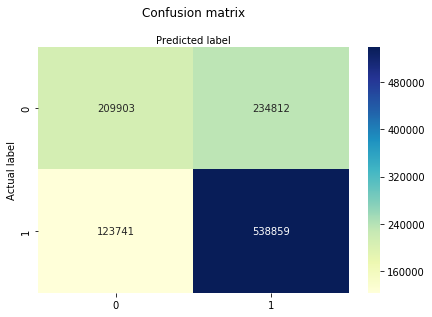

In [657]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [658]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6761960237150224
Precision: 0.6964963143248228
Recall: 0.8132493208572291


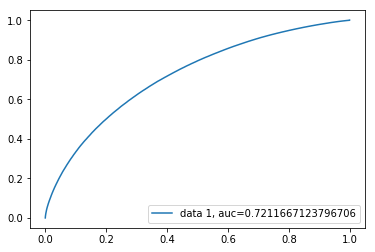

In [659]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [660]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


In [661]:
auc

0.7211667123796706

In [662]:
type(fpr)

numpy.ndarray

In [663]:
print('Train/Test split results:')

Train/Test split results:


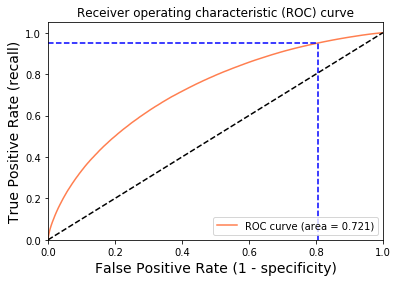

In [664]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
